#### Exercicis: 
- Exercici 1: Crea almenys dos models de classificació diferents per intentar predir el millor les classes de l'arxiu adjunt.
- Exercici 2: Compara els models de classificació utilitzant la precisió (accuracy), una matriu de confusió i d’altres mètriques més avançades.
- Exercici 3: Entrena’ls usant els diferents paràmetres que admeten per tal de millorar-ne la predicció.
- Exercici 4: Compara el seu rendiment fent servir l’aproximació traint/test o cross-validation.
- Exercici 5: Aplica algun procés d'enginyeria per millorar els resultats (normalització, estandardització, mostreig...)

#### Neteja i interpretació de les dades.

In [116]:
## LLibreries 
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

In [111]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [2]:
cols = ['class', 'alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'OD280/OD315_of_diluted wines', 'proline']
wines = pd.read_csv('/Users/juliacorominasfont/Desktop/DATA ANALYST/Bootcamp IT Academy/Tasques Sprints/Sprint_7_ML_classification/wineData.txt', names=cols)
wines.head()

,class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,OD280/OD315_of_diluted wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
wines.shape

(178, 14)

El dataset té 178 registres i 14 columnes, incloent la variable objectiu. Els 13 atributs contenen una variable continua i són:

- alcohol: Contingut d'alcohol en el vi, generalment mesurat en percentatge d'alcohol volumètric.
- malic_acid: àcid màlic present al vi, una substància que pot afectar el sabor i la textura del vi.
- ash: quantitat de cendra present en el vi després de la fermentació. A vegades es considera com una mesura de minerals.
- alcalinity_of_ash: nivell de basicitat de la cendra present en el vi. Pot donar una indicació de la qualitat de la matèria prima.
- magnesium: contingut de magnesi en el vi, que pot influir en diversos aspectes com el color i la fermentació.
- total_phenols: quantitat total de fenols, compostos que poden influir en el color, sabor i aroma del vi.
- flavanoids: quantitat d'un tipus específic de fenols que poden contribuir als atributs organolèptics del vi, com el sabor i l'olor.
- nonflavanoid_phenols: quantitat de fenols que no són flavonoides, una altra classe de compostos que pot tenir efectes sobre les característiques organolèptiques del vi.
- proanthocyanins: quantitat d'un tipus específic de flavonoides que poden tenir efectes positius sobre la salut i contribuir a la complexitat del vi.
- color_intensity: la intensitat del color del vi, la qual pot donar indicacions sobre la maduresa dels raïms i altres factors.
- hue: la tonalitat del color del vi, pot proporcionar informació sobre la varietat de raïm utilitzada.
- OD280/OD315_of_diluted wines: una relació òptica que pot estar relacionada amb la intensitat del color del vi.
- proline: la quantitat de proline, un aminoàcid, present en el vi, que pot ser un indicador de la maduresa del raïm i de la fermentació.

La variable objectiu (o target) és class, que fa referència a les possibles classes de vi (1, 2 o 3). La resta d'atributs constitueixen el 'feature matrix'. 

In [9]:
wines.duplicated().sum()

0

In [10]:
wines.isnull().sum()

class                           0
alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
OD280/OD315_of_diluted wines    0
proline                         0
dtype: int64

In [11]:
wines.dtypes

class                             int64
alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                         int64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
OD280/OD315_of_diluted wines    float64
proline                           int64
dtype: object

In [12]:
wines['class'].unique()

array([1, 2, 3])

### EDA

<Figure size 800x500 with 0 Axes>

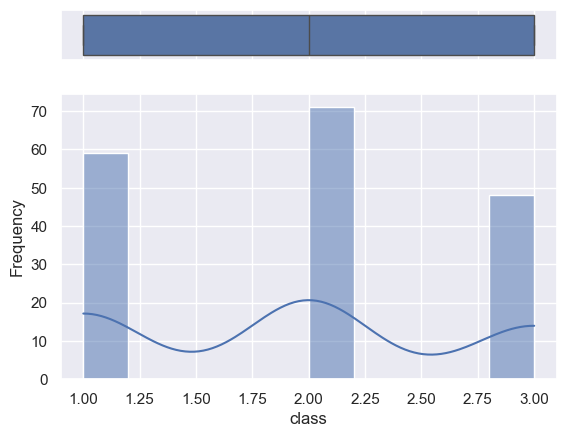

<Figure size 800x500 with 0 Axes>

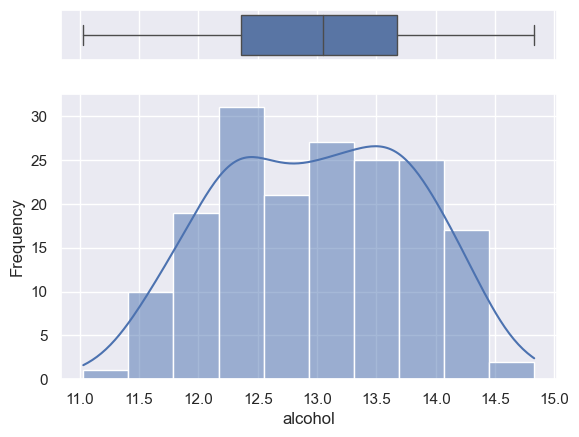

<Figure size 800x500 with 0 Axes>

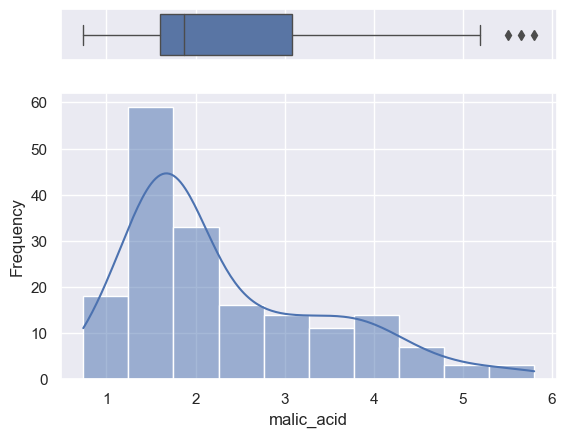

<Figure size 800x500 with 0 Axes>

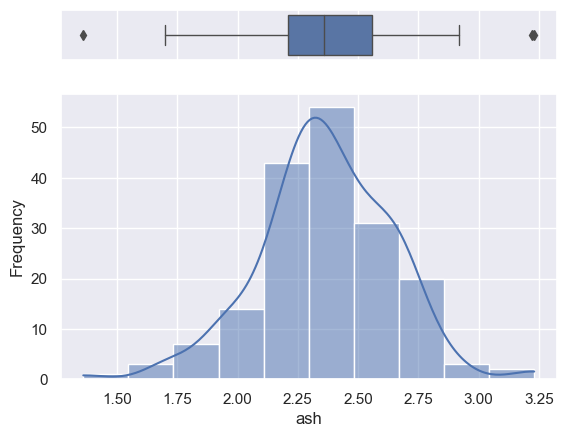

<Figure size 800x500 with 0 Axes>

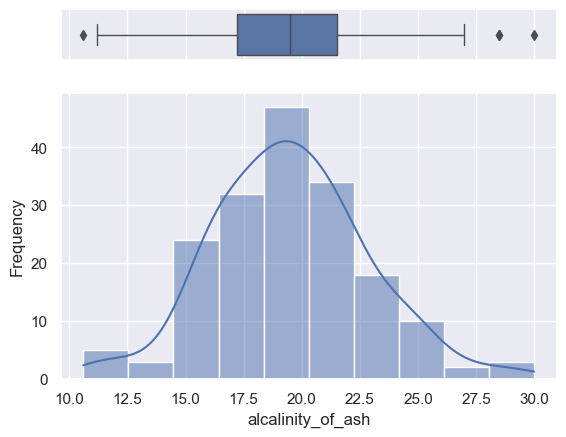

<Figure size 800x500 with 0 Axes>

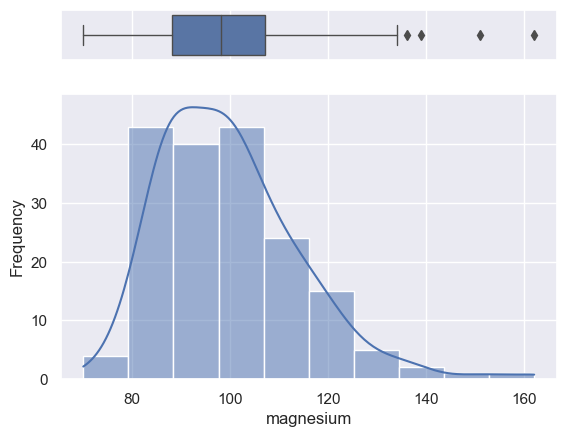

<Figure size 800x500 with 0 Axes>

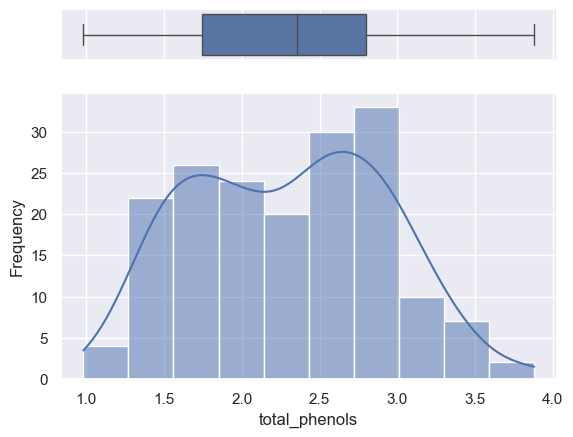

<Figure size 800x500 with 0 Axes>

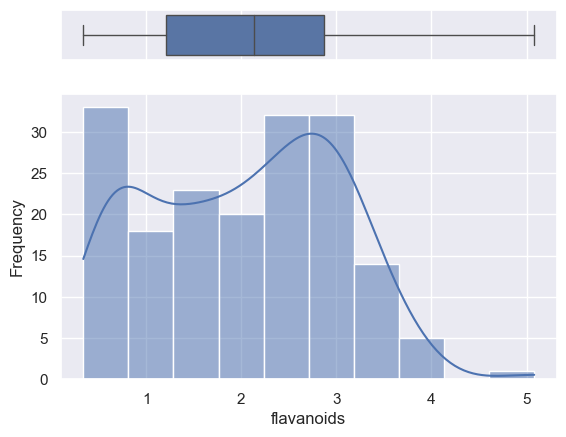

<Figure size 800x500 with 0 Axes>

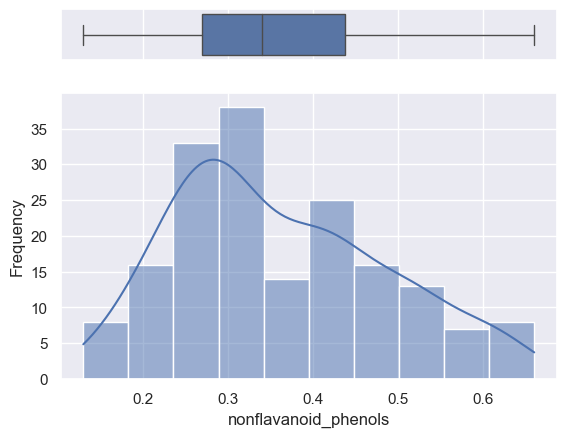

<Figure size 800x500 with 0 Axes>

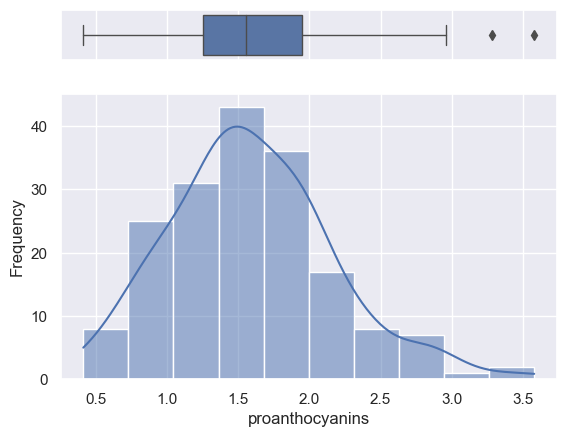

<Figure size 800x500 with 0 Axes>

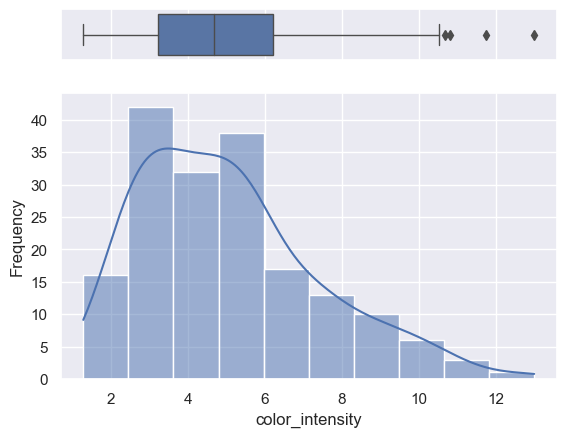

<Figure size 800x500 with 0 Axes>

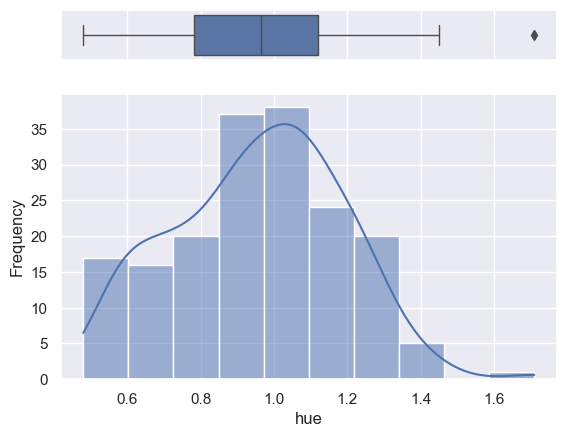

<Figure size 800x500 with 0 Axes>

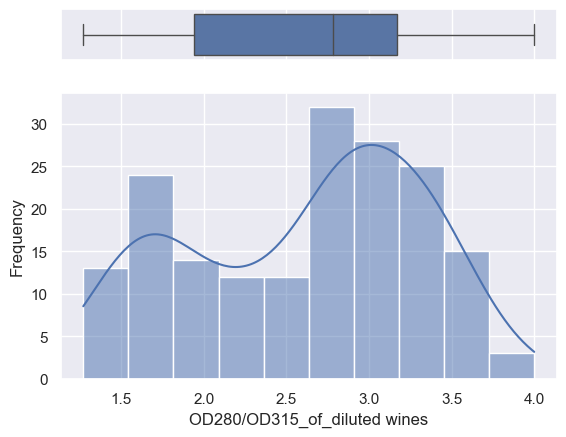

<Figure size 800x500 with 0 Axes>

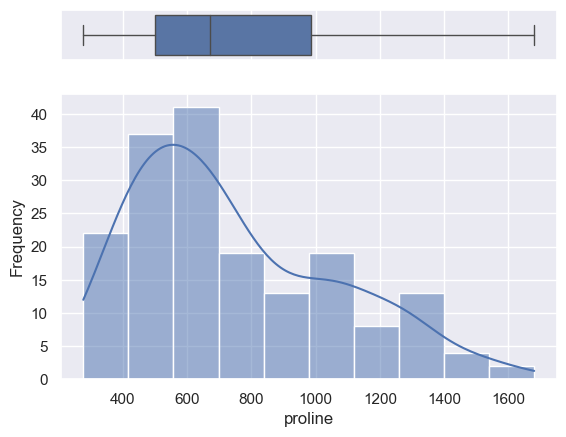

In [17]:
for i in cols:
    plt.figure(figsize=(8, 5))
    sns.set()
    
    # Filtrem els valors no nuls en la columna actual
    filtered_data = wines[wines[i].notna()]
    
    # Creem un subplot amb dos àreas: boxplot i histogram
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
    
    # Dibuixem el boxplot en la part superior i en forma horitzontal
    sns.boxplot(x=filtered_data[i], orient="h", ax=ax_box, linewidth=1.0)
    
    # Dibuixem l'histograma en la part inferiors
    sns.histplot(filtered_data[i], ax=ax_hist, bins=10, kde=True)
    
    # Afegim títols als subplots
    ax_box.set(xlabel='')
    ax_hist.set(xlabel=i)
    
    plt.gca().set(xlabel= i,ylabel='Frequency')

Podríem considerar que les variables ash i alcalinity_ash tenen una distribució normal, per tant, el seu tractament serà diferent a la resta. Pel que fa als outliers, veiem que les variables malic_acid, magnesium, proanthocyains, color_intensity i hue tenen outliers. La resta, alcohol, total_phenols, flavanoids, nonflavanoids_phenols, OD280/0D315_of_diluted_wines i proline, no en tenen. Per tant, en les primeres aplicarem el Robuscaler() i a la resta el MinMaxScaler().

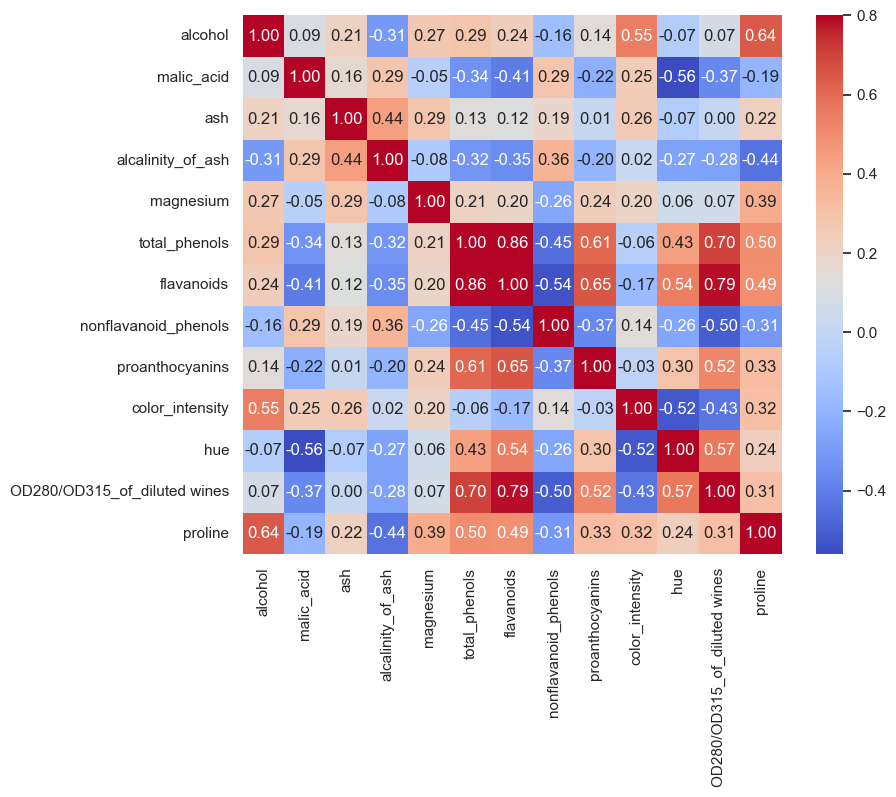

In [19]:
#Relació entre variables numèriques 
variables_numeriques = ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'OD280/OD315_of_diluted wines', 'proline'] 

f, ax = plt.subplots(figsize=(9, 7))
sns.heatmap(wines[variables_numeriques].corr(), vmax=.8, square=True, annot=True, cmap='coolwarm', fmt=".2f");
plt.show()

Les variables amb una correlació més forta són total_phenols i flavanoids, de 0,86. La primera fa referència a la quantitat total de fenols i la segona a la quantitat d'un tipus específic de fenols. Per tant, un augment de la quantitat de flavanoids està associat a un augment del nombre de fenols.

En canvi, passa el contrari si ens fixem en la relació entre les variables total_phenols i nonflavanoid_phenols, ja que la correlació és negativa, de 0,45. És a dir, un augment de la variable total_phenols està associat a una disminució de la variable nonflavanoid_phenols.

La segona correlació més forta entre variables és la que existeix entre la variable flavanoids i OD280/OD315_of_diluted wines. La segona es refereix a una relació òptica que pot estar relacionada amb la intensitat del color del vi. Per tant, l'augment de flavanoids està associada a un augment de la intensitat del color del vi.

In [75]:
wines[variables_numeriques].corrwith(wines['class'])

alcohol                        -0.328222
malic_acid                      0.437776
ash                            -0.049643
alcalinity_of_ash               0.517859
magnesium                      -0.209179
total_phenols                  -0.719163
flavanoids                     -0.847498
nonflavanoid_phenols            0.489109
proanthocyanins                -0.499130
color_intensity                 0.265668
hue                            -0.617369
OD280/OD315_of_diluted wines   -0.788230
proline                        -0.633717
dtype: float64

Veiem que hi ha bastanta correlació entre les variables i la variable target, especialment amb les variables flavanois, total_phenols i OD280/OD315_of_diluted wines, que en tots els casos és negativa.

### Transformacions

Variables numèriques: hem vist que hi ha variables normals, i la resta algunes tenen outliers i altres no. Per tant, apliquem la transformació corresponent per a cada cas concret.

In [22]:
numeric_features = ['ash', 'alcalinity_of_ash']
numeric_transformer = Pipeline(
    [
        ('imputer_num', SimpleImputer(strategy = 'median')),
         ('standard', StandardScaler())
    ]
)

numeric_features_outliers = ['malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'proanthocyanins', 'color_intensity', 'hue']
numeric_transformer_outliers = Pipeline(
    [
        ('imputer_num', SimpleImputer(strategy = 'median')),
        ('robust', RobustScaler())
    ]
)

numeric_features_minmax = ['alcohol', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'OD280/OD315_of_diluted wines', 'proline']
numeric_transformer_minmax = Pipeline(
    [
        ('imputer_num', SimpleImputer(strategy = 'median')),
        ('minmax', MinMaxScaler())
    ]
)

### Pipeline

Apliquem les transformacions

In [25]:
preprocessor = ColumnTransformer(
    [
        ('numericals', numeric_transformer, numeric_features),
        ('numericals_outliers', numeric_transformer_outliers, numeric_features_outliers),
        ('numericals_minmax', numeric_transformer_minmax, numeric_features_minmax) 
    ],
    remainder = 'drop'
)

### Models

In [26]:
wines

,class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,OD280/OD315_of_diluted wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [29]:
# Variables X i y
X = wines.drop('class', axis=1)
y = wines['class']

In [30]:
y.value_counts()

2    71
1    59
3    48
Name: class, dtype: int64

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Forma del Training set: X={}, y={}'.format(X_train.shape, y_train.shape))
print('Forma del Test set: X={}, y={}'.format(X_test.shape, y_test.shape))

Forma del Training set: X=(142, 13), y=(142,)
Forma del Test set: X=(36, 13), y=(36,)


In [33]:
X_train

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,OD280/OD315_of_diluted wines,proline
158,14.34,1.68,2.70,25.0,98,2.80,1.31,0.53,2.70,13.00,0.57,1.96,660
137,12.53,5.51,2.64,25.0,96,1.79,0.60,0.63,1.10,5.00,0.82,1.69,515
98,12.37,1.07,2.10,18.5,88,3.52,3.75,0.24,1.95,4.50,1.04,2.77,660
159,13.48,1.67,2.64,22.5,89,2.60,1.10,0.52,2.29,11.75,0.57,1.78,620
38,13.07,1.50,2.10,15.5,98,2.40,2.64,0.28,1.37,3.70,1.18,2.69,1020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,13.86,1.51,2.67,25.0,86,2.95,2.86,0.21,1.87,3.38,1.36,3.16,410
106,12.25,1.73,2.12,19.0,80,1.65,2.03,0.37,1.63,3.40,1.00,3.17,510
14,14.38,1.87,2.38,12.0,102,3.30,3.64,0.29,2.96,7.50,1.20,3.00,1547
92,12.69,1.53,2.26,20.7,80,1.38,1.46,0.58,1.62,3.05,0.96,2.06,495


#### Exercici 1. Crea almenys dos models de classificació diferents per intentar predir el millor les classes de l'arxiu adjunt.

Els models que he escollit són K-nearest neighbors (kNN) i Suport Vector Machine (SVM), amb tots els paràmetres que venen per defecte.

#### (1) K-nearest neighbors (kNN)

In [80]:
knn_model = KNeighborsClassifier()

## Pipeline knn
pipeline_knn = Pipeline([
            ('preprocessing', preprocessor),
            ('model', knn_model)
        ])

pipeline_knn.fit(X_train, y_train)
y_pred_knn = pipeline_knn.predict(X_test)

#### (2) Support Vector Machines (SVM)

In [81]:
svm_model = SVC() 

## Pipeline svc
pipeline_svm = Pipeline([
            ('preprocessing', preprocessor),
            ('model', svm_model)
        ])

pipeline_svm.fit(X_train, y_train)
y_pred_svm = pipeline_svm.predict(X_test)

#### Exercici 2: Compara els models de classificació utilitzant la precisió (accuracy), una matriu de confusió i d’altres mètriques més avançades.

Per comparar el rendiment dels models farem servir la mètrica de precisió (accuracy), la matriu de confusió i el classification report, que també inclou les mètriques recall i f1-score. Comencem per la matriu de confusió.

<Axes: >

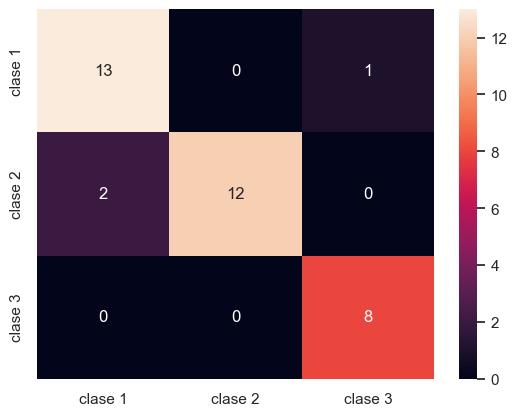

In [86]:
## Knn
cm_knn = confusion_matrix(y_test, y_pred_knn, labels =pipeline_knn.classes_)
classes = ['clase 1', 'clase 2', 'clase 3']
sns.heatmap(cm_knn, annot=True, xticklabels=classes, yticklabels=classes)

Veiem que el model ha acertat en tots els casos excepte: dos vins de la classe 2, que els ha classificat com si fóssin de la classe 1, i un de la classe 1, que l'ha classificat com de la classe 3.
Ho comparem amb el rendiment del model svm:

<Axes: >

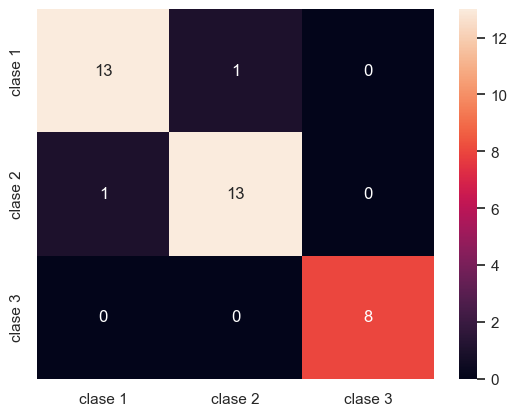

In [87]:
## SVM
cm_svm = confusion_matrix(y_test, y_pred_svm, labels =pipeline_knn.classes_)
classes = ['clase 1', 'clase 2', 'clase 3']
sns.heatmap(cm_svm, annot=True, xticklabels=classes, yticklabels=classes)

Veiem que en aquest cas el model té també un molt bon rendiment, inclus amb un error menys. En aquest cas només ha classificat un vi de la classe 2 com a vi de la classe 1, i viceversa.
A continuació ens fixem en la mètrica de precisió (accuracy), que calcula el percentatge de vins classificats correctament.

In [88]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_svm =accuracy_score(y_test, y_pred_svm)
print("La precisió del model KNN és: ", accuracy_knn)
print("La precisió del model SVM és:", accuracy_svm)

La precisió del model KNN és:  0.9166666666666666
La precisió del model SVM és: 0.9444444444444444


Els resultats confirmen el que ja hem vist amb les matrius de confusió: el model SVM té un millor rendiment, però igualment els dos models són molt bons. El model Knn ha classificat els vins correctament en un 91,7% dels casos, i el model svm en un 94,4%.

Per últim ens centrem en la mètrica f1-score, que és una combinació de les mètriques recall i accuracy. 

In [90]:
f1_knn = f1_score(y_test, y_pred_knn, average='micro')
f1_svm = f1_score(y_test, y_pred_svm, average='micro')
print("El F1 score del del KNN és:", f1_knn)
print("El F1 score del model SVM és:", f1_svm)

El F1 score del del KNN és: 0.9166666666666666
El F1 score del model SVM és: 0.9444444444444444


En aquest cas també s'obtenen molt bons resultats, i millors en el cas del model SVM.

#### Exercici 3: Entrena’ls usant els diferents paràmetres que admeten per tal de millorar-ne la predicció.

Començarem fent el tunning dels paràmatres del model KNN.

In [101]:
# Definició de la cuadrícula de paràmetres pel KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7],        
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

In [102]:
grid_search_knn = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid_knn,scoring='accuracy')
grid_search_knn.fit(X_train, y_train)
best_params_knn = grid_search_knn.best_params_
print("Els millors paràmetres del model KNN són:", best_params_knn)

Els millors paràmetres del model KNN són: {'algorithm': 'auto', 'n_neighbors': 7, 'weights': 'distance'}


In [103]:
y_pred_best_knn = grid_search_knn.best_estimator_.predict(X_test)

<Axes: >

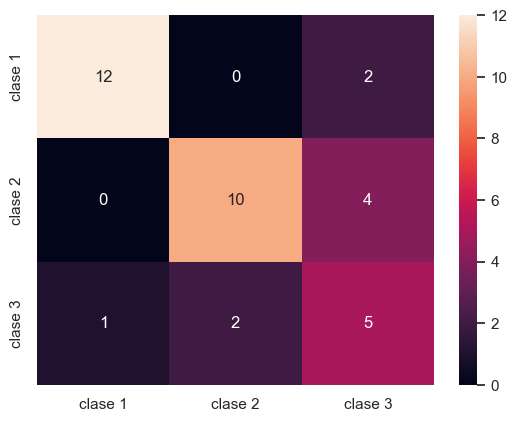

In [104]:
cm_best_knn = confusion_matrix(y_test, y_pred_best_knn, labels=grid_search_knn.classes_)
sns.heatmap(cm_best_knn, annot=True, xticklabels=classes, yticklabels=classes)

In [105]:
accuracy_best_knn = accuracy_score(y_test, y_pred_best_knn)
print("La puntuació en 'accuracy' abans d'aplicar el GridSearch era:", accuracy_knn)
print("La puntuació en 'accuracy' després d'aplicar el GridSearch és:", accuracy_best_knn)

La puntuació en 'accuracy' abans d'aplicar el GridSearch era: 0.9166666666666666
La puntuació en 'accuracy' després d'aplicar el GridSearch és: 0.75


Sorprenentment, el tunning dels hiperparàmetres no ha tingut el resultat que esperàvem: la matriu de confusió mostra que el model ha tingut més errors i la mètrica de precisió té un resultat bastant menor. 

Això pot ser degut a que al enumerar manualment els paràmetres ens haguem deixat algun que es va utilitzar en la configuració per defecte. De totes maneres, és impossible fer servir tots els paràmetres possibles, pels costos computacionals que suposa. És per això que cal cenyir-se a uns quants a l'hora de fer les proves.

Ara fem el tunning dels paràmetres del model SVM:

In [95]:
# Definició de la cuadrícula de paràmetres pel SVM
param_grid_svm = {
    'C': [0.1, 1, 10],          
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto', 0.1, 1],
    'degree': [2, 3, 4]
}

In [106]:
grid_search_svm = GridSearchCV(estimator=SVC(), param_grid=param_grid_svm, scoring='accuracy')
grid_search_svm.fit(X_train, y_train)
best_params_svm = grid_search_svm.best_params_
print("Els millors paràmetres del model SVM són:", best_params_svm)

Els millors paràmetres del model SVM són: {'C': 0.1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}


In [107]:
y_pred_best_svm = grid_search_svm.best_estimator_.predict(X_test)

<Axes: >

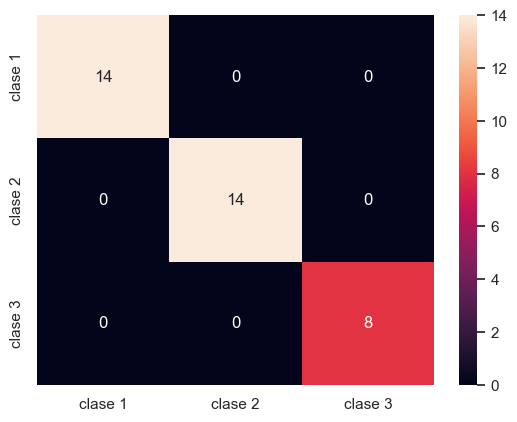

In [108]:
cm_best_svm = confusion_matrix(y_test, y_pred_best_svm, labels=grid_search_svm.classes_)
sns.heatmap(cm_best_svm, annot=True, xticklabels=classes, yticklabels=classes)

In [109]:
accuracy_best_svm = accuracy_score(y_test, y_pred_best_svm)
print("La puntuació en 'accuracy' abans d'aplicar el GridSearch era:", accuracy_svm)
print("La puntuació en 'accuracy' després d'aplicar el GridSearch és:", accuracy_best_svm)

La puntuació en 'accuracy' abans d'aplicar el GridSearch era: 0.9444444444444444
La puntuació en 'accuracy' després d'aplicar el GridSearch és: 1.0


En aquest cas el tunning dels hiperparàmetres ha millorat encara més el rendiment del model. La matriu de confusió mostra que el model no ha tingut cap error i la mètrica de precisió té un resultat igual a 1.

#### Exercici 4: Compara el seu rendiment fent servir l’aproximació traint/test o cross-validation.

Comencem pel model KNN. Degut a que amb el tunning dels hiperparàmatres no hem pogut millorar el model, compararem l'aproximació cross-validation amb el primer entrenament del model, és a dir, amb els paràmetres per defecte.

In [113]:
model_cv_knn = KNeighborsClassifier().fit(X,y)
accuracy_cv_knn = cross_val_score(model_cv_knn, X, y, cv=5, scoring='accuracy')
print("La puntuació en 'accuracy' del model KNN en l'aproximación train test era", accuracy_knn)
print("La puntuació en 'accuracy' del model SVM en l'aproximación de validació creuada és", accuracy_cv_knn.mean())

La puntuació en 'accuracy' del model KNN en l'aproximación train test era 0.9166666666666666
La puntuació en 'accuracy' del model SVM en l'aproximación de validació creuada és 0.6912698412698413


Veiem que amb l'aproximació de validació creuada el model knn obté una puntuació notablement inferior que amb l'aproximació train tets. Això vol dir que el model no s'ajusta de tot bé al conjunt de dades. 

Fem el mateix amb el model SVM. En aquest cas si que hem aconseguit millorar el rendiment del model amb el tunning dels hiperparàmetres, per tant, fem servir els millors paràmatres trobats.

In [115]:
model_cv_svm = SVC(C=0.1, degree= 2, gamma='scale', kernel='linear').fit(X,y)
accuracy_cv_svm = cross_val_score(model_cv_svm, X, y, cv=5, scoring='accuracy')
print("La puntuació en 'accuracy' del model SVM en l'aproximación train test era", accuracy_best_svm)
print("La puntuació en 'accuracy' del model SVM en l'aproximación de validació creuada és", accuracy_cv_svm.mean())

La puntuació en 'accuracy' del model SVM en l'aproximación train test era 1.0
La puntuació en 'accuracy' del model SVM en l'aproximación de validació creuada és 0.961111111111111


En aquest cas el rendiment del model tampoc ha millorat amb l'aproximació de validació creuada, cosa que no sorprèn donat que amb l'aproximació train test ja s'havia aconseguit la màxima puntuació. També podem dir que el model SVM s'ha mantingut més consistent que el model KNN i que s'ha adaptat millor al conjunt de dades.

#### Exercici 5: Aplica algun procés d'enginyeria per millorar els resultats (normalització, estandardització, mostreig...)

Prèviament a construir els models en l'Exercici 1, ja s'han aplicat processos d'enginyeria per a millorar els resultats del model. En concret:
- el StandardScaler(): per estandaritzar els valors amb una distribució normal,
- el RobustScaler(): per escalar els valors amb outliers, i
- el MinMaxScaler(): per escalar els valors sense outliers.